In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the account-level data
df = pd.read_csv("Prompt1AccountLevel.csv")

# (Optional) Preview the columns and data
print(df.columns.tolist())
df.head()


['AccountNumber', 'Season', 'SingleGameTickets', 'PartialPlanTickets', 'GroupTickets', 'STM', 'AvgSpend', 'GamesAttended', 'FanSegment', 'DistanceToArena', 'BasketballPropensity', 'SocialMediaEngagement', 'A Games', 'B Games', 'C Games', 'D Games', 'Weekend Games', 'Weekday Games', 'Promotional Games', 'Non Promo Games', 'A + Weekend + Promo', 'A + Weekend + nonPromo', 'A + Weekday + Promo', 'A + Weekday + nonPromo', 'B + Weekend + Promo', 'B + Weekend + nonPromo', 'B + Weekday + Promo', 'B + Weekday + nonPromo', 'C + Weekend + Promo', 'C + Weekend + nonPromo', 'C + Weekday + Promo', 'C + Weekday + nonPromo', 'D + Weekend + Promo', 'D + Weekend + nonPromo', 'D + Weekday + Promo', 'D + Weekday + nonPromo', 'NumGamesAttend']


,AccountNumber,Season,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,...,B + Weekday + nonPromo,C + Weekend + Promo,C + Weekend + nonPromo,C + Weekday + Promo,C + Weekday + nonPromo,D + Weekend + Promo,D + Weekend + nonPromo,D + Weekday + Promo,D + Weekday + nonPromo,NumGamesAttend
0,1,2023,0,0,0,0,$467.00,1,F,12.0,...,0,0,0,0,0,0,0,24,0,1
1,2,2023,2,0,0,0,$95.00,1,A,47.0,...,0,0,0,0,0,0,0,0,0,1
2,3,2023,3,0,0,0,$107.00,1,B,6.0,...,0,0,0,0,0,0,0,0,3,1
3,4,2023,0,0,3,0,$27.00,1,C,3.0,...,0,0,0,0,0,0,0,0,3,1
4,5,2023,0,0,2,0,$14.00,1,A,4.0,...,0,0,0,0,0,0,0,0,2,1


In [2]:
# Select all columns from "A Games" until "NumGamesAttend"
# This uses .loc slicing based on column labels.
pca_cols = df.loc[:, "A Games":"NumGamesAttend"]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_cols)

# Check the shape and first few rows of the scaled data
print("Shape of PCA input:", X_scaled.shape)


Shape of PCA input: (44211, 25)


Explained Variance Ratio: [0.66944775 0.07730257]


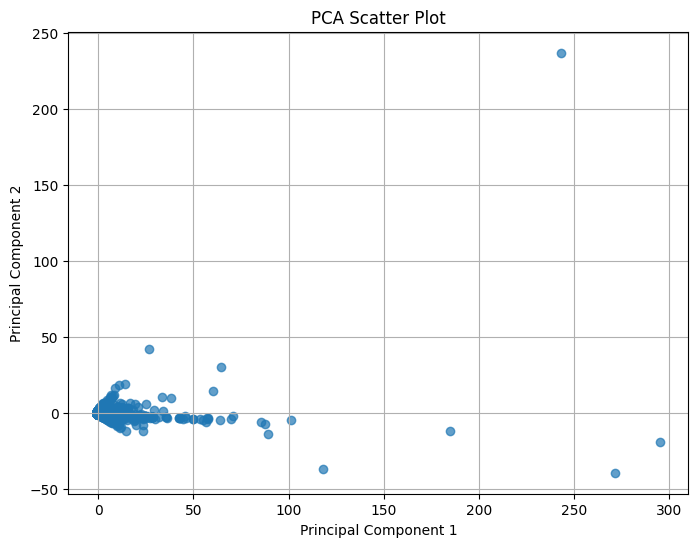

In [3]:
# Run PCA (we use 2 components for a 2D scatter plot)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratios
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Create a basic scatter plot of PC1 vs PC2
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.grid(True)
plt.show()


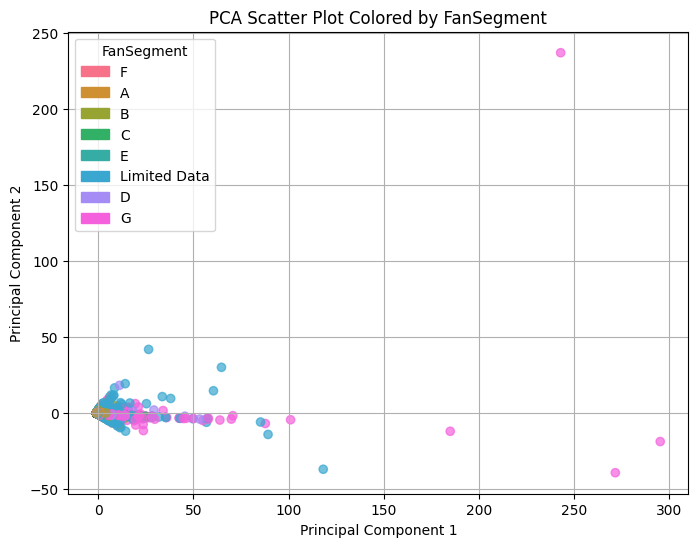

In [4]:
# Extract the FanSegment column (this column is not used in PCA but for coloring)
fan_segments = df["FanSegment"]

# Determine the unique fan segments and create a color palette for them
unique_segments = fan_segments.unique()
colors = sns.color_palette("husl", len(unique_segments))
color_map = dict(zip(unique_segments, colors))

# Map each fan segment to its corresponding color
point_colors = fan_segments.map(color_map)

# Create the color-coded scatter plot of the PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=point_colors, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot Colored by FanSegment")
plt.grid(True)

# Create legend handles manually
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=color_map[seg], label=seg) for seg in unique_segments]
plt.legend(handles=patches, title="FanSegment", loc="best")
plt.show()


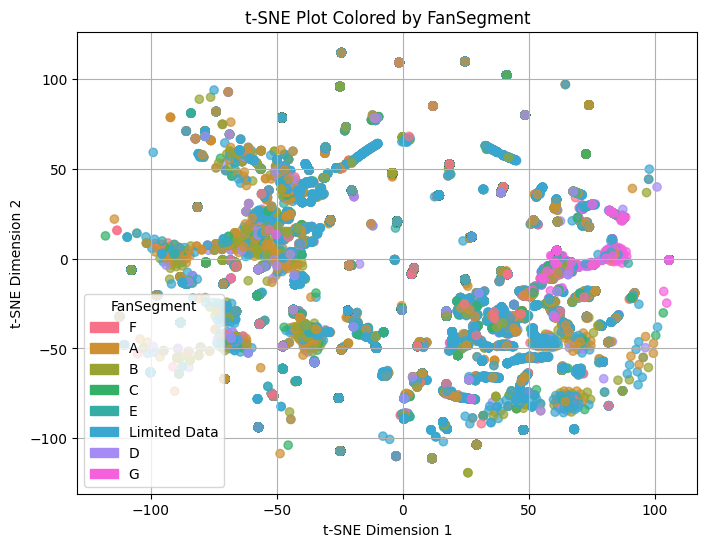

In [5]:
from sklearn.manifold import TSNE

# Run t-SNE on the standardized data (the same X_scaled we used for PCA)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a scatter plot of the t-SNE results, using the same colors as before
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=point_colors, alpha=0.7)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Plot Colored by FanSegment")
plt.grid(True)

# Create legend handles (using the same color_map and unique_segments from the PCA cell)
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=color_map[seg], label=seg) for seg in unique_segments]
plt.legend(handles=patches, title="FanSegment", loc="best")
plt.show()
